In [3]:
import math
import numpy as np
import pandas as pd
from tqdm import tqdm

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
sns.set_palette("bright")

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Load Data

In [4]:
diabetes = load_diabetes()
X, y = diabetes['data'], diabetes['target']
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

# Train/Test Split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
X_train.shape

(353, 10)

In [7]:
X_test.shape

(89, 10)

In [8]:
y_train.shape

(353,)

In [9]:
y_test.shape

(89,)

# Train Linear Regression Model

In [10]:
lr_model_pipeline = Pipeline(steps=[('scaler', StandardScaler()),
                                    ('regression', LinearRegression())])

In [11]:
lr_model_pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('regression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

# Evaluate Linear Regression Model

In [12]:
y_pred = lr_model_pipeline.predict(X_test)

In [13]:
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

53.85325698491442


 # Interpret Linear Regression Model

In [14]:
lr_model = lr_model_pipeline.named_steps['regression']
feature_names = diabetes['feature_names']
weights = lr_model.coef_

In [15]:
weights

array([  1.75358647, -11.51189881,  25.60697957,  16.82909953,
       -44.44753934,  24.64008688,   7.676205  ,  13.13840865,
        35.16068784,   2.35138623])

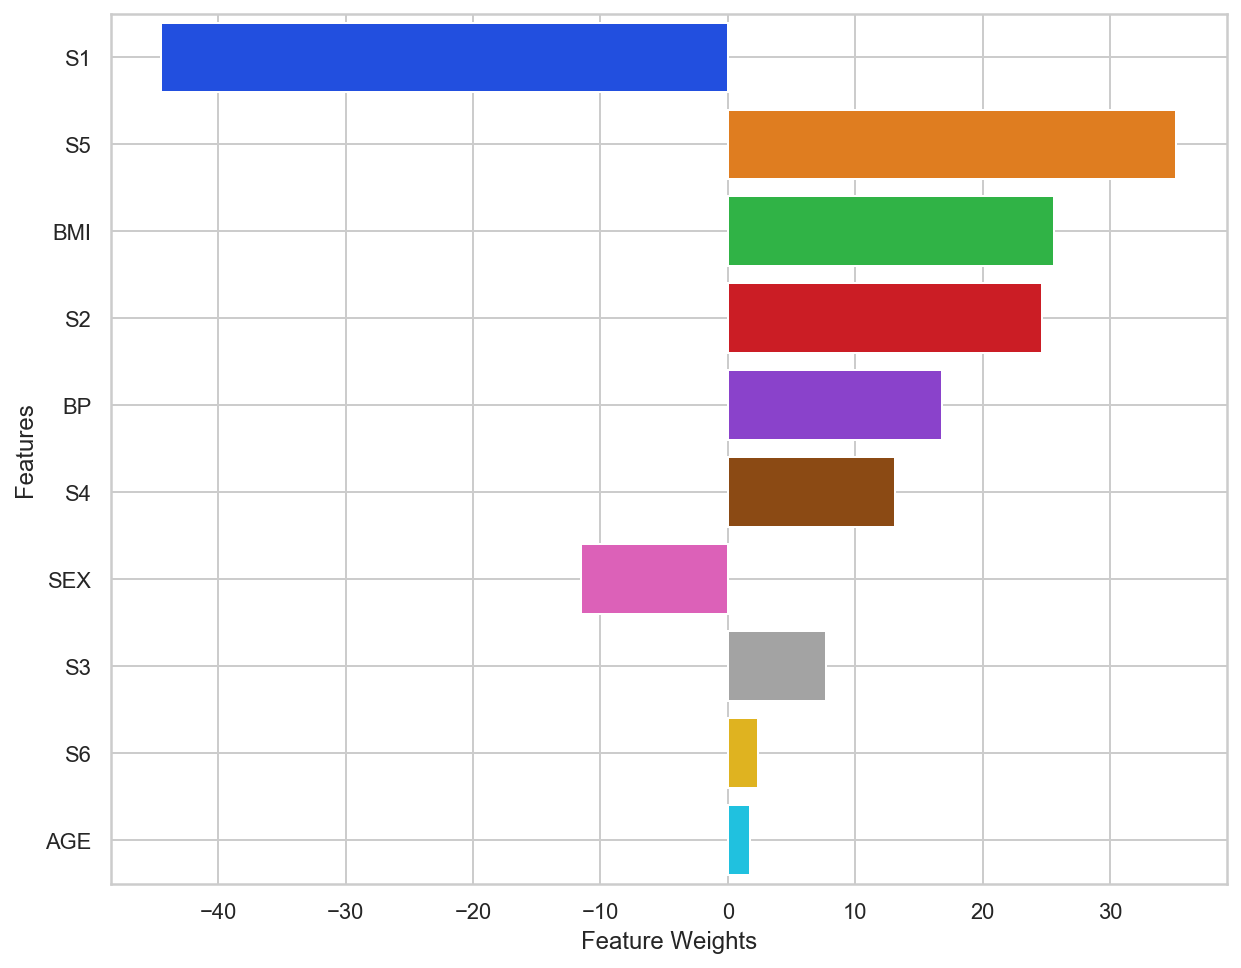

In [16]:
feature_importance_idx = np.argsort(np.abs(weights))[::-1]
feature_importance = [feature_names[idx].upper() for idx in feature_importance_idx]
feature_importance_values = [weights[idx] for idx in feature_importance_idx]
f, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x=feature_importance_values, y=feature_importance, ax=ax)
ax.grid(True)
ax.set_xlabel('Feature Weights')
ax.set_ylabel('Features')
f.savefig('images/chapter_02_linear_regression_feature_importance.png', dpi=220, bbox_inches='tight');
f.savefig('images/chapter_02_linear_regression_feature_importance.svg', format='svg', dpi=220, bbox_inches='tight');

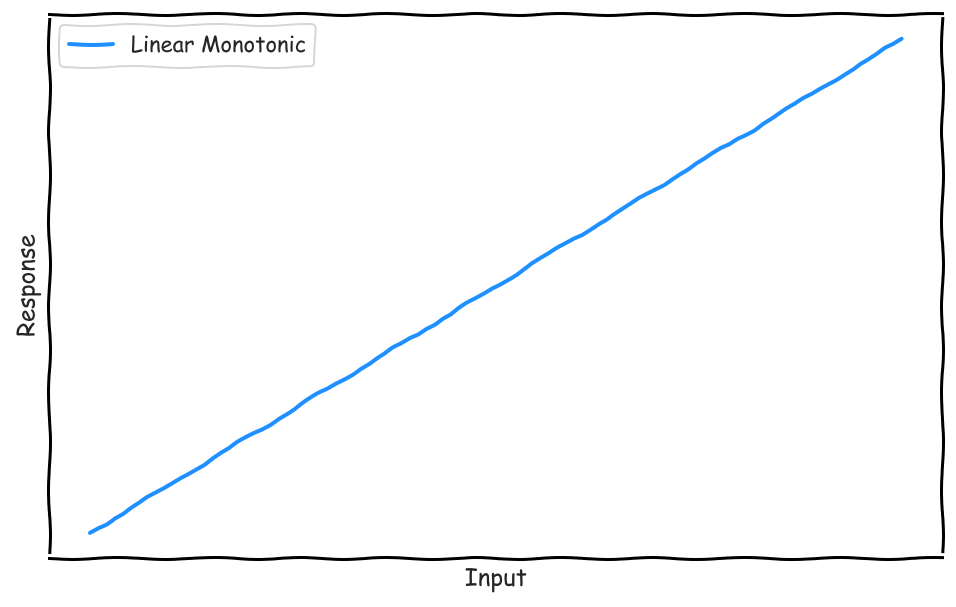

In [22]:
size = 100
input_x = np.arange(0, size)
linear_monotonic_increasing_y = 4 * input_x + np.random.rand(size)
with plt.xkcd():
    f, ax = plt.subplots(figsize=(8, 5))
    ax.plot(input_x, linear_monotonic_increasing_y, 'dodgerblue', label='Linear Monotonic')
    ax.set_xlabel('Input')
    ax.set_ylabel('Response')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.legend()
    f.savefig('images/chapter_02_linear_response.png', dpi=220, bbox_inches='tight');
    f.savefig('images/chapter_02_linear_response.svg', format='svg', dpi=220, bbox_inches='tight');

# Train Decision Tree Model

In [25]:
dt_model_pipeline = Pipeline(steps=[('scaler', StandardScaler()),
                                    ('regression', DecisionTreeRegressor(max_depth=None, random_state=42))])
dt_model_pipeline2 = Pipeline(steps=[('scaler', StandardScaler()),
                                    ('regression', DecisionTreeRegressor(max_depth=3, random_state=42))])

In [26]:
dt_model_pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('regression',
                 DecisionTreeRegressor(criterion='mse', max_depth=None,
                                       max_features=None, max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       presort=False, random_state=42,
                                       splitter='best'))],
         verbose=False)

In [27]:
dt_model_pipeline2.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('regression',
                 DecisionTreeRegressor(criterion='mse', max_depth=3,
                                       max_features=None, max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       presort=False, random_state=42,
                                       splitter='best'))],
         verbose=False)

# Evaluate Decision Tree Model

In [28]:
y_pred = dt_model_pipeline.predict(X_test)

In [29]:
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

69.9796117981211


In [30]:
y_pred2 = dt_model_pipeline2.predict(X_test)

In [31]:
rmse2 = math.sqrt(mean_squared_error(y_test, y_pred2))
print(rmse2)

60.466411593115076


# Interpret Decision Tree Model

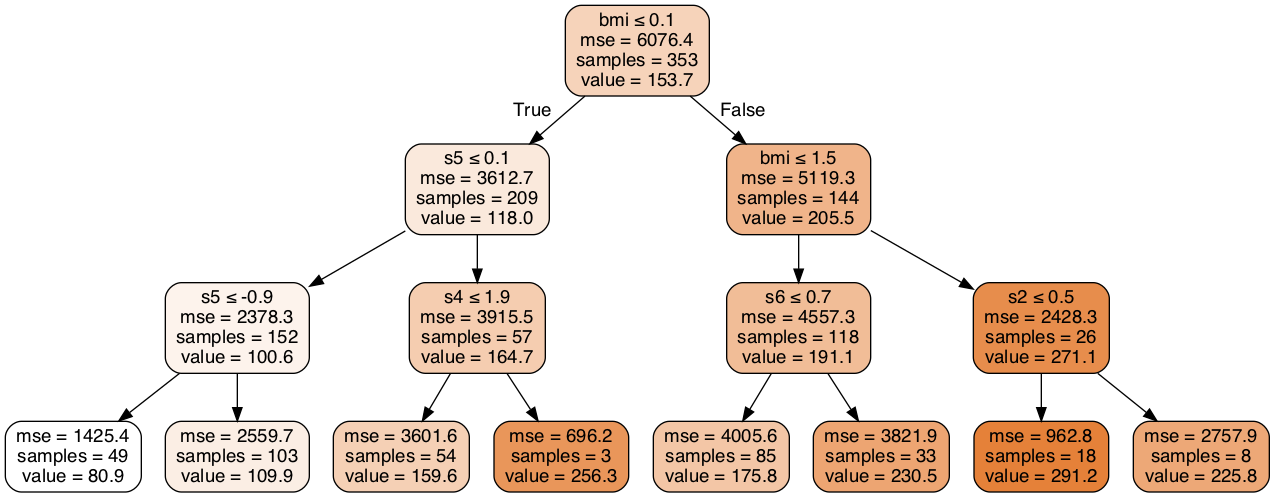

In [32]:
diabetes_dt_dot_data = StringIO()
feature_names = diabetes.feature_names
export_graphviz(dt_model_pipeline2.named_steps['regression'], 
                out_file=diabetes_dt_dot_data,
                filled=True, rounded=True,
                feature_names=feature_names,
                precision=1,
                special_characters=True)
dt_graph = pydotplus.graph_from_dot_data(diabetes_dt_dot_data.getvalue())  
dt_graph.write_png('images/chapter_02_decision_tree.png')
dt_graph.write_svg('images/chapter_02_decision_tree.svg')
Image(dt_graph.create_png())

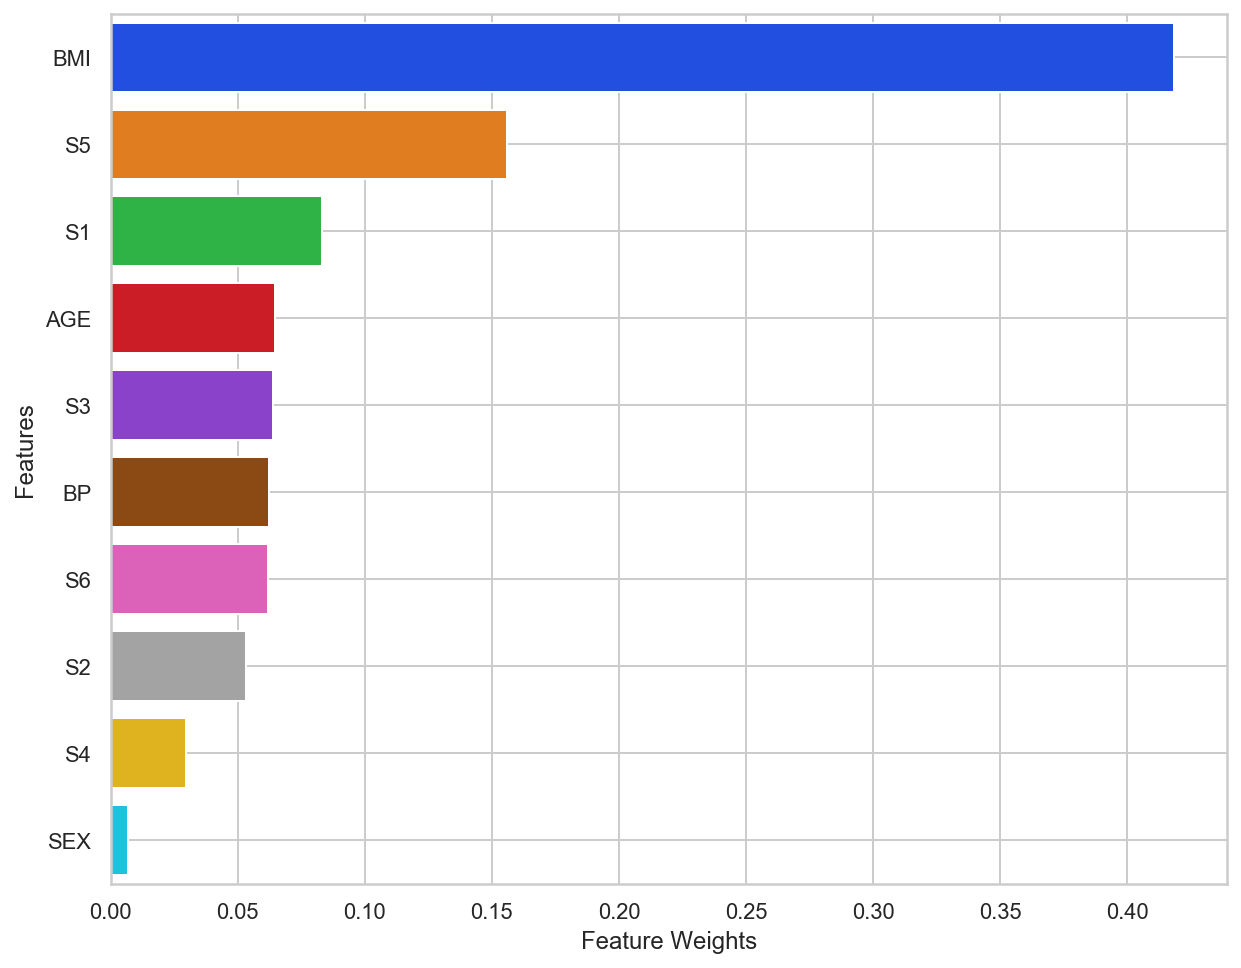

In [33]:
weights = dt_model_pipeline.named_steps['regression'].feature_importances_
feature_importance_idx = np.argsort(np.abs(weights))[::-1]
feature_importance = [feature_names[idx].upper() for idx in feature_importance_idx]
feature_importance_values = [weights[idx] for idx in feature_importance_idx]
f, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x=feature_importance_values, y=feature_importance, ax=ax)
ax.grid(True)
ax.set_xlabel('Feature Weights')
ax.set_ylabel('Features')
f.savefig('images/chapter_02_decision_tree_feature_importance.png', dpi=220, bbox_inches='tight');
f.savefig('images/chapter_02_decision_tree_feature_importance.svg', format='svg', dpi=220, bbox_inches='tight');

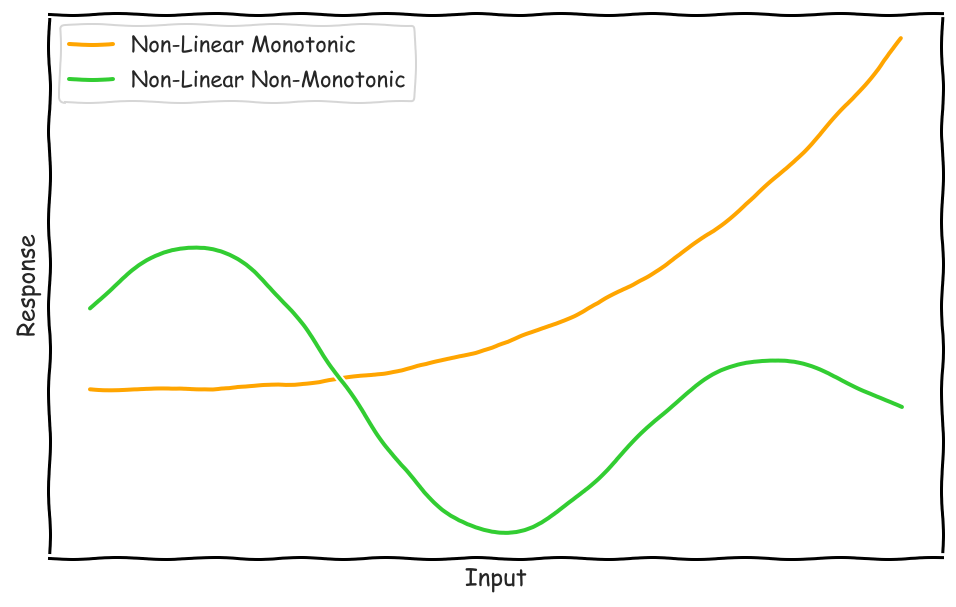

In [34]:
size = 100
input_x = np.arange(0, size)
nonlinear_monotonic_increasing_y = (input_x ** 3) / 1500 + np.random.rand(size) + 500
nonlinear_nonmonotonic_y = (np.cos(input_x/ 20) + np.sin(input_x / 10)) * 150 + 500
with plt.xkcd():
    f, ax = plt.subplots(figsize=(8, 5))
    ax.plot(input_x, nonlinear_monotonic_increasing_y, 'orange', label='Non-Linear Monotonic')
    ax.plot(input_x, nonlinear_nonmonotonic_y, 'limegreen', label='Non-Linear Non-Monotonic')
    ax.set_xlabel('Input')
    ax.set_ylabel('Response')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.legend()
    f.savefig('images/chapter_02_nonlinear_response.png', dpi=220, bbox_inches='tight');
    f.savefig('images/chapter_02_nonlinear_response.svg', format='svg', dpi=220, bbox_inches='tight');